<a href="https://colab.research.google.com/github/kimhwidam/Deep-Learning/blob/main/DL_3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL 3일차 - Basic of Pytorch

### MNIST 데이터 분류

In [27]:
# 모듈 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
# cuda 설정 -> gpu
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is', device)

Current cuda device is cuda


In [29]:
# 파라미터 설정
batch_size = 50
learning_rate = 1e-3
epoch_num = 15

# MNIST 데이터 불러오기
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

print('number of train data: ', len(train_data))
print('number of test data: ', len(test_data))

number of train data:  60000
number of test data:  10000


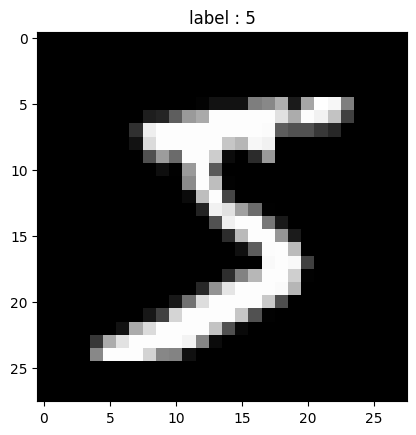

In [30]:
# 그림 확인해보기
image, label = train_data[0]

# squeeze() -> 차원이 1인 차원을 제거
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

In [31]:
# 미니 배치 구성
# 배치 단위로 데이터 공급 -> DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)
first_batch = train_loader.__iter__().__next__()

In [32]:
len(train_loader)

1200

In [33]:
type(first_batch[0])

torch.Tensor

In [37]:
# 모델 생성 클래스
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, padding='same')
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding='same')
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(3136, 1000) # 7*7*64 = 3136
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [38]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [39]:
# 학습
model.train()
i = 1
for epoch in range(epoch_num):
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}'.format(i, loss.item()))
        i += 1

Train Step: 1000	Loss: 0.030
Train Step: 2000	Loss: 0.001
Train Step: 3000	Loss: 0.021
Train Step: 4000	Loss: 0.012
Train Step: 5000	Loss: 0.001
Train Step: 6000	Loss: 0.064
Train Step: 7000	Loss: 0.028
Train Step: 8000	Loss: 0.003
Train Step: 9000	Loss: 0.000
Train Step: 10000	Loss: 0.001
Train Step: 11000	Loss: 0.000
Train Step: 12000	Loss: 0.003
Train Step: 13000	Loss: 0.000
Train Step: 14000	Loss: 0.154
Train Step: 15000	Loss: 0.000
Train Step: 16000	Loss: 0.000
Train Step: 17000	Loss: 0.000
Train Step: 18000	Loss: 0.000


In [41]:
# 평가
model.eval()

correct = 0

for data, target in test_loader:
    data, target = data.to(device), target.to(device)

    ouput = model(data)
    prediction = output.data.max(1)[1]
    correct += prediction.eq(target.data).sum()

print(correct / 10000)


tensor(0.1003, device='cuda:0')
